In [1]:
import pandas as pd
import matplotlib.pyplot as plt  
from tqdm import tqdm
from ast import literal_eval
import seaborn as sns
import re
import numpy as np
from sklearn.externals import joblib
from sklearn.preprocessing import MultiLabelBinarizer

players= pd.read_csv('/home/ern-lin/data_analysis/datasets/dota2_players.csv')
players.tail(20)

/home/ern-lin/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


,match_id,account_id,hero_id,player_slot,gold,gold_spent,gold_per_min,xp_per_min,kills,deaths,...,unit_order_glyph,unit_order_eject_item_from_stash,unit_order_cast_rune,unit_order_ping_ability,unit_order_move_to_direction,unit_order_patrol,unit_order_vector_target_position,unit_order_radar,unit_order_set_item_combine_lock,unit_order_continue
28979,2897,0,104,132,2688,12525,515,472,4,2,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN
28980,2898,14549,12,0,802,6500,279,313,4,12,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28981,2898,0,42,1,533,10305,360,444,2,7,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28982,2898,14550,33,2,401,6220,247,236,1,9,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
28983,2898,14551,46,3,557,7910,306,373,4,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28984,2898,0,67,4,1696,5625,292,318,2,12,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28985,2898,0,74,128,6294,10925,536,689,11,1,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
28986,2898,0,75,129,740,12320,425,463,11,4,...,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN
28987,2898,14552,16,130,211,14125,482,487,12,5,...,1.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
28988,2898,14553,9,131,936,13640,457,489,12,3,...,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
players= pd.read_csv('/home/ern-lin/data_analysis/datasets/dota2_players.csv', usecols=["hero_id", "gold_spent", "xp_hero"])
players.tail(20)

,hero_id,gold_spent,xp_hero
28979,104,12525,6417.0
28980,12,6500,2889.0
28981,42,10305,4426.0
28982,33,6220,1478.0
28983,46,7910,6198.0
28984,67,5625,3217.0
28985,74,10925,13881.0
28986,75,12320,4494.0
28987,16,14125,10005.0
28988,9,13640,9980.0


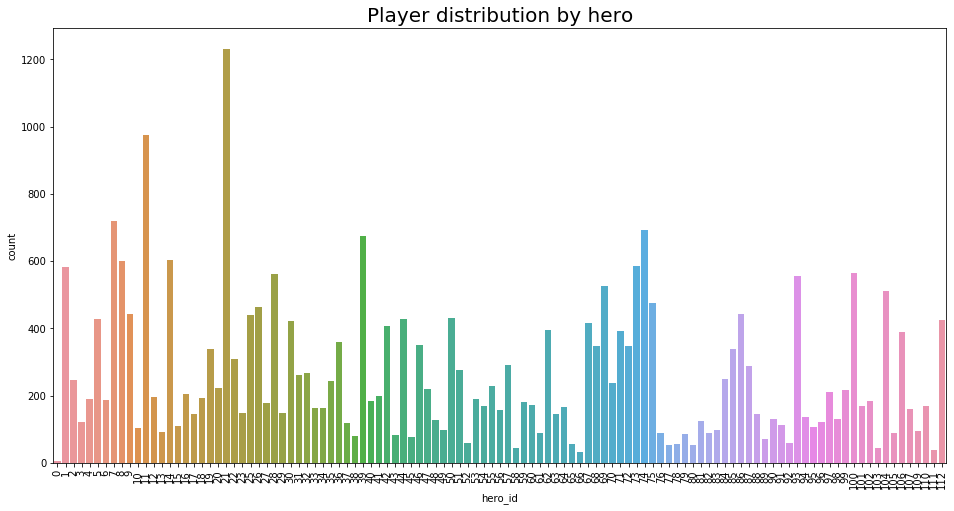

In [3]:
plt.figure(figsize=(16,8))
sns.countplot(players['hero_id'].sort_values())
plt.title("Player distribution by hero", fontsize=20)
loc, labels = plt.xticks()
plt.xticks(fontsize=10, rotation=90)
plt.show()

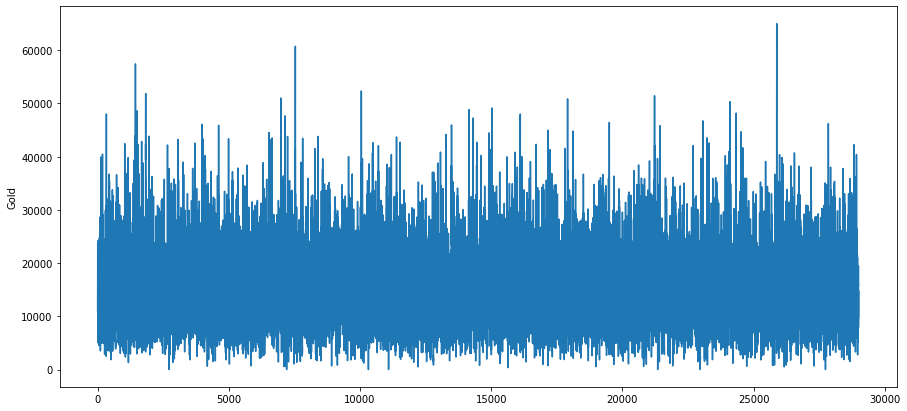

In [4]:
plt.figure(figsize=(15,7))
players.gold_spent.plot()
plt.ylabel('Gold')
plt.show()

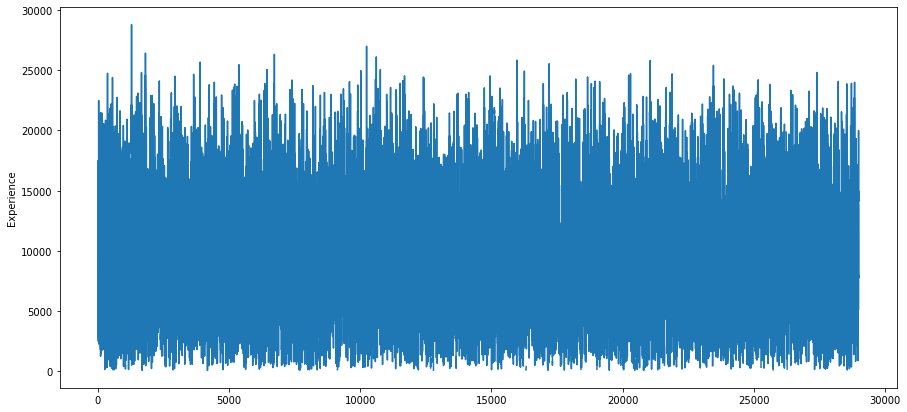

In [5]:
plt.figure(figsize=(15,7))
players.xp_hero.plot()
plt.ylabel('Experience')
plt.show()

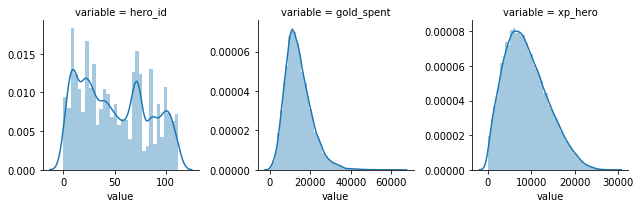

In [6]:
num = [f for f in players.columns if players.dtypes[f] != 'object']
nd = pd.melt(players, value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

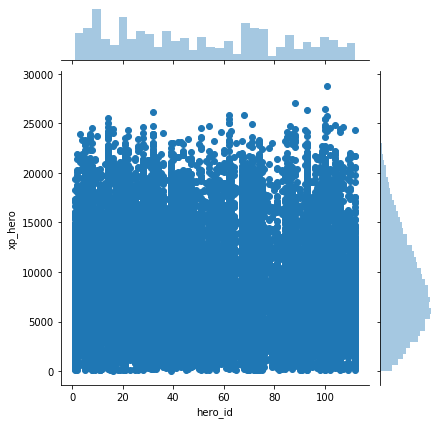

In [7]:
sns.jointplot(x=players['hero_id'], y=players['xp_hero'])

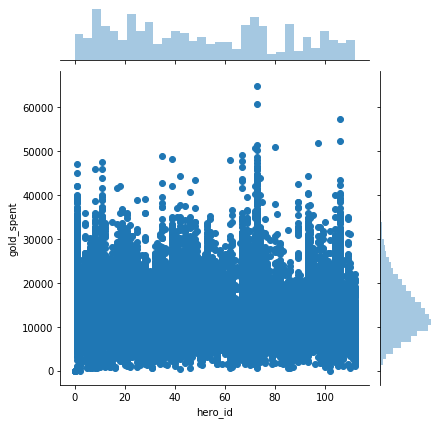

In [8]:
sns.jointplot(x=players['hero_id'], y=players['gold_spent'])